# Project Title: Mazao Maximization

The "Mazao Maximization" project focuses on predicting rainfall patterns and seasons, as well as determining the most suitable crops for various regions of the country. One key aspect of this project is to pinpoint the optimal timing for planting crops to maximize profitability. Here's a detailed outline of the project:
### Overview

Brief overview of the project's objectives. Importance of understanding rainfall patterns and their impact on crop selection and profitability.

### Problem statement:
The primary challenge confronting farmers in Kenya revolves around the optimal timing for planting crops throughout the year to ensure profitability. Predicting rainfall patterns proves to be a formidable task, further complicating decision-making. Additionally, determining the most suitable crop for a given period presents another hurdle. Lastly, maximizing profits through effective crop sales poses a significant challenge.

### Objective:
#### Main Objectives:

1. Develop a reliable forecasting system for rainfall patterns in Kenya to aid farmers in making informed decisions regarding crop planting schedules.
2. Research and recommend appropriate crop varieties and cultivation techniques tailored to different periods of the year, considering varying environmental conditions.
3. Design and implement strategies to improve market access and optimize sales channels for farmers, ensuring maximum profitability for their produce.
#### Specific Objectives:
- Analyze historical meteorological data to identify trends and patterns in rainfall distribution across different regions of Kenya.
- Utilize advanced statistical models and machine learning algorithms to forecast rainfall with greater accuracy, providing timely information to farmers.
- Establish a user-friendly platform or mobile application for farmers to access real-time weather forecasts and receive personalized planting recommendations.
- Conduct field trials and experiments to evaluate the performance of different crop varieties under varying climatic conditions prevalent in Kenya.

**Importing python libraries**

In [59]:
import numpy as np
import pandas as pd 
import mysql.connector as cx

import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# creating a connection
connection = cx.connect(host ="localhost", user= "root", password= "Oindi001**", database ="kilimo")
# creating cursor
mycursor= connection.cursor()

**Displaying Tables**

In [61]:
# Creating the query
Sql_Query= "SHOW TABLES"
# executing the query
mycursor.execute(Sql_Query)
# geting all the tables  
tables = mycursor.fetchall()

In [62]:
for table in tables :
    print(table[0])


food_prices_kenya
kenya_inflation_rate
kenya_rainfall
market_prices
weekly_retail_averages


**Reading the tables and converting into a dataframe.**

In [7]:
# #reading the tables 
# mycursor.execute("SELECT * FROM fews_net_staple_food_price_data")
# # getting the content of my tables 
# results = mycursor.fetchall()
# # converting to DataFrame
# df= pd. DataFrame(results, columns= mycursor.column_names)
# df.head()

**Creating a function to load all the table from DB and converting them a to Dataframes**

In [63]:
import pandas as pd

def table_to_dataframe(table_name, cursor):
    # Executing an SQL query to select all data from the specified table
    cursor.execute(f"SELECT * FROM {table_name}")
    
    # Fetching all the results of the query
    results = cursor.fetchall()
    
    # Converting the fetched results into a DataFrame using pandas
    df = pd.DataFrame(results, columns=cursor.column_names,)
    
    return df


#### Data exploration

In [64]:
food_df = table_to_dataframe("food_prices_kenya", mycursor)
food_df.shape

(14160, 14)

In [10]:
# renaming admim columns 
food_df=food_df.rename(columns={'admin1': "region", 'admin2':'county'})

In [11]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14160 entries, 0 to 14159
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       14160 non-null  object
 1   region     14160 non-null  object
 2   county     14160 non-null  object
 3   market     14160 non-null  object
 4   latitude   14160 non-null  object
 5   longitude  14160 non-null  object
 6   category   14160 non-null  object
 7   commodity  14160 non-null  object
 8   unit       14160 non-null  object
 9   priceflag  14160 non-null  object
 10  pricetype  14160 non-null  object
 11  currency   14160 non-null  object
 12  price      14160 non-null  object
 13  usdprice   14160 non-null  object
dtypes: object(14)
memory usage: 1.5+ MB


Thedre is need to convert date to datatime, prices to float, coordinates to flaot etc. 

In [12]:
food_df.commodity.value_counts()

Maize (white)                1652
Beans (dry)                  1309
Maize                        1062
Potatoes (Irish)              921
Sorghum                       835
Beans                         602
Oil (vegetable)               543
Tomatoes                      385
Cabbage                       377
Sugar                         373
Salt                          364
Milk (UHT)                    348
Maize flour                   347
Wheat flour                   338
Kale                          330
Onions (dry)                  326
Bananas                       321
Beans (yellow)                306
Maize (white, dry)            295
Potatoes (Irish, white)       293
Beans (rosecoco)              216
Rice                          216
Rice (aromatic)               205
Beans (dolichos)              198
Meat (beef)                   192
Cowpeas                       190
Meat (goat)                   165
Milk (cow, pasteurized)       161
Bread                         150
Potatoes (Iris

In [13]:
food_df.describe()

date       region   county   market   latitude  longitude  \
count       14160        14160    14160    14160      14160      14160   
unique        216            8       23       63         63         63   
top     4/15/2021  Rift Valley  Nairobi  Nairobi  -1.283333  36.816667   
freq          512         5432     2954     1496       1496       1496   

                  category      commodity   unit priceflag  pricetype  \
count                14160          14160  14160     14160      14160   
unique                   9             48     15         3          3   
top     cereals and tubers  Maize (white)     KG    actual  Wholesale   
freq                  6695           1652   5803      9597       7631   

       currency  price usdprice  
count     14160  14160    14160  
unique        2   6420    10412  
top         KES     10    0.091  
freq      14159    334       29

unique values sees to be few, 215 dates only

In [14]:
# cheking for null values 
food_df.isnull().sum()

date         0
region       0
county       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

There are no null value , we shall check for place values as well

In [15]:
print (food_df.county.unique())

['#adm2+name' 'Mombasa' 'Kitui' 'Nairobi' 'Mandera' 'Kisumu' 'Turkana'
 'Uasin Gishu' 'Marsabit' 'Nakuru' 'Kilifi' 'Tana River' 'Garissa'
 'Baringo' 'Kajiado' 'Nyeri' 'Kwale' 'Makueni' 'West Pokot' 'Machakos'
 'Meru South' 'Isiolo' 'Wajir']


In [16]:
print (food_df.region.unique())

['#adm1+name' 'Coast' 'Eastern' 'Nairobi' 'North Eastern' 'Nyanza'
 'Rift Valley' 'Central']


In [17]:
rainfall_df = table_to_dataframe("kenya_rainfall", mycursor)
rainfall_df.head()

Year Month Average  Rainfall - (MM)
0  1991   Jan Average          38.2847
1  1991   Feb Average          12.7492
2  1991   Mar Average          73.3656
3  1991   Apr Average          83.1350
4  1991   May Average         112.2750

In [18]:
rainfall_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             312 non-null    int64  
 1   Month Average    312 non-null    object 
 2   Rainfall - (MM)  312 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.4+ KB


In [19]:
rainfall_df=rainfall_df.rename(columns={"Rainfall - (MM)" : "Rainfall"})

In [20]:
rainfall_df .shape

(312, 3)

In [21]:
rainfall_df.isnull().sum()

Year             0
Month Average    0
Rainfall         0
dtype: int64

In [22]:
print (f'Max year : {rainfall_df .Year.max()} \nMin year : {rainfall_df .Year.min()}')


Max year : 2016 
Min year : 1991


In [23]:
print (f'Max rainfall : {rainfall_df . Rainfall.max()} mm \nMin year : {rainfall_df . Rainfall.min()} mm')

Max rainfall : 247.081 mm 
Min year : 1.15765 mm


In [24]:
inflation = table_to_dataframe("kenya_inflation_rate", mycursor)
inflation.head()

MyUnknownColumn Inflation Rates MyUnknownColumn_[0] MyUnknownColumn_[1]  \
0            Period         Nairobi                                           
1                      Lower Income       Middle Income        Upper Income   
2              2018                                                           
3  January.........            6.49                6.35                3.91   
4   February.......            5.75                5.77                4.18   

  MyUnknownColumn_[2]  MyUnknownColumn_[3] MyUnknownColumn_[4]  
0                      Rest of Urban Areas           Kenya CPI  
1            Combined                                           
2                                                               
3                6.37                 3.80                4.83  
4                5.70                 3.62                4.46

In [25]:
weekly_retail_price_df = table_to_dataframe("weekly_retail_averages", mycursor)
weekly_retail_price_df.head()

ï»¿DateTime  Dry Maize  Beans (Yellow-Green) Red Irish potato Tilapia  \
0  1/27/2024 21:00         40                   175               40     500   
1  1/28/2024 21:00         53                   184               38     488   
2  1/29/2024 21:00         45                   176               87     386   
3  1/30/2024 21:00         60                   186                      967   
4  1/31/2024 21:00         59                   149              100           

  Meat Beef  Kales/Sukuma Wiki  
0                           40  
1       533                127  
2       583                 48  
3       600                 37  
4       600                 41

In [26]:
market_price_df = table_to_dataframe("market_prices", mycursor)
market_price_df.head()

Commodity Classification Grade Sex           Market  \
0  Beans (Canadian wonder)              -     -   -   Kabiyet Market   
1  Beans (Canadian wonder)              -     -   -  Nakuru Wakulima   
2  Beans (Canadian wonder)              -     -   -  Nakuru Wakulima   
3  Beans (Canadian wonder)              -     -   -  Nakuru Wakulima   
4  Beans (Canadian wonder)              -     -   -  Nakuru Wakulima   

   Wholesale     Retail Supply Volume  County        Date  
0  400.00/Kg  500.00/Kg        2500.0   Nandi  2024-03-29  
1  130.00/Kg         -                 Nakuru  2024-03-28  
2  130.00/Kg         -          720.0  Nakuru  2024-03-27  
3  130.00/Kg         -                 Nakuru  2024-03-26  
4  130.00/Kg         -                 Nakuru  2024-03-25

In [27]:
market_price_df.shape

(131541, 10)

In [28]:
market_price_df.Commodity.value_counts()

Dry Maize                        28272
Ground Nuts                      19420
Beans (Yellow-Green)             17541
Red Sorghum                      17475
Fertilizer                       13499
Beans Red Haricot (Wairimu)      10044
Beans (Mwezi Moja)                8524
Beans (Canadian wonder)           7669
Cow Milk(At collection point)     4971
White Sorghum                     4126
Name: Commodity, dtype: int64

In [29]:
market_price_df.isnull().sum()

Commodity         0
Classification    0
Grade             0
Sex               0
Market            0
Wholesale         0
Retail            0
Supply Volume     0
County            0
Date              0
dtype: int64

The is a place holder "-"

In [30]:
market_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131541 entries, 0 to 131540
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Commodity       131541 non-null  object
 1   Classification  131541 non-null  object
 2   Grade           131541 non-null  object
 3   Sex             131541 non-null  object
 4   Market          131541 non-null  object
 5   Wholesale       131541 non-null  object
 6   Retail          131541 non-null  object
 7   Supply Volume   131541 non-null  object
 8   County          131541 non-null  object
 9   Date            131541 non-null  object
dtypes: object(10)
memory usage: 10.0+ MB


In [31]:
market_price_df.head()

Commodity Classification Grade Sex           Market  \
0  Beans (Canadian wonder)              -     -   -   Kabiyet Market   
1  Beans (Canadian wonder)              -     -   -  Nakuru Wakulima   
2  Beans (Canadian wonder)              -     -   -  Nakuru Wakulima   
3  Beans (Canadian wonder)              -     -   -  Nakuru Wakulima   
4  Beans (Canadian wonder)              -     -   -  Nakuru Wakulima   

   Wholesale     Retail Supply Volume  County        Date  
0  400.00/Kg  500.00/Kg        2500.0   Nandi  2024-03-29  
1  130.00/Kg         -                 Nakuru  2024-03-28  
2  130.00/Kg         -          720.0  Nakuru  2024-03-27  
3  130.00/Kg         -                 Nakuru  2024-03-26  
4  130.00/Kg         -                 Nakuru  2024-03-25

In [32]:
market_price_df.Commodity.unique()

array(['Beans (Canadian wonder)', 'Beans (Mwezi Moja)',
       'Beans (Yellow-Green)', 'Beans Red Haricot (Wairimu)',
       'Cow Milk(At collection point)', 'Fertilizer', 'Ground Nuts',
       'Dry Maize', 'Red Sorghum', 'White Sorghum'], dtype=object)

In [33]:
# close mycursor and connection
mycursor .close ()
connection .close ()

### Data Cleaning 

**Staple food table**


In [34]:
# revomoving the first row in food datasets 
# removing unnecessary fields 
food_df=food_df.drop(["market"], axis = 1)
food_df=food_df.drop(food_df.index[0])

In [35]:
food_df.head()

date   region   county   latitude  longitude            category  \
1  1/15/2006    Coast  Mombasa      -4.05  39.666667  cereals and tubers   
2  1/15/2006    Coast  Mombasa      -4.05  39.666667  cereals and tubers   
3  1/15/2006  Eastern    Kitui  -1.366667  38.016667  cereals and tubers   
4  1/15/2006  Eastern    Kitui  -1.366667  38.016667  cereals and tubers   
5  1/15/2006  Eastern    Kitui  -1.366667  38.016667  cereals and tubers   

          commodity   unit priceflag  pricetype currency    price usdprice  
1             Maize     KG    actual  Wholesale      KES    16.13   0.2235  
2     Maize (white)  90 KG    actual  Wholesale      KES     1480  20.5041  
3     Maize (white)     KG    actual     Retail      KES       17   0.2355  
4  Potatoes (Irish)  50 KG    actual  Wholesale      KES  1249.99  17.3175  
5           Sorghum  90 KG    actual  Wholesale      KES     1800  24.9374

In [36]:
# Dropping the catgegry and currency column. the main focus is the specif crops/products hennce no category required. 
# currency colunm is a repetiton of the last two culumns 
food_df.drop(['category','currency'], axis=1, inplace =True)

# renaming thes price and usdprice to make them more descriptive 
food_df.rename(columns={'price': "price(ksh)", "usdprice":"price(usd)", 'unit': 'unit(kg)'}, inplace = True)


In [37]:
food_df.head()

date   region   county   latitude  longitude         commodity  \
1  1/15/2006    Coast  Mombasa      -4.05  39.666667             Maize   
2  1/15/2006    Coast  Mombasa      -4.05  39.666667     Maize (white)   
3  1/15/2006  Eastern    Kitui  -1.366667  38.016667     Maize (white)   
4  1/15/2006  Eastern    Kitui  -1.366667  38.016667  Potatoes (Irish)   
5  1/15/2006  Eastern    Kitui  -1.366667  38.016667           Sorghum   

  unit(kg) priceflag  pricetype price(ksh) price(usd)  
1       KG    actual  Wholesale      16.13     0.2235  
2    90 KG    actual  Wholesale       1480    20.5041  
3       KG    actual     Retail         17     0.2355  
4    50 KG    actual  Wholesale    1249.99    17.3175  
5    90 KG    actual  Wholesale       1800    24.9374

In [38]:
# Droping products that are not on the forcus of study.

# List of items to be dropped
items_to_drop = [
    'Potatoes (Irish)',
    'Oil (vegetable)',
    'Tomatoes',
    'Cabbage',
    'Sugar',
    'Salt',
    'Milk (UHT)',
    'Maize flour',
    'Wheat flour',
    'Kale',
    'Onions (dry)',
    'Bananas',
    'Potatoes (Irish, white)',
    'Rice',
    'Rice (aromatic)',
    'Meat (beef)',
    'Cowpeas',
    'Meat (goat)',
    'Milk (cow, pasteurized)',
    'Bread',
    'Potatoes (Irish, red)',
    'Meat (camel)',
    'Cooking fat',
    'Milk (camel, fresh)',
    'Millet (finger)',
    'Fuel (kerosene)',
    'Fuel (diesel)',
    'Fuel (petrol-gasoline)',
    'Spinach',
    'Cowpea leaves',
    'Fish (omena, dry)',
    'Milk (cow, fresh)',
    'Rice (imported, Pakistan)',
    'Onions (red)'
]

# Dropping rows containing specified items
food_df = food_df[~food_df['commodity'].isin(items_to_drop)]


In [39]:
food_df.commodity.value_counts()

Maize (white)         1652
Beans (dry)           1309
Maize                 1062
Sorghum                835
Beans                  602
Beans (yellow)         306
Maize (white, dry)     295
Beans (rosecoco)       216
Beans (dolichos)       198
Sorghum (white)        102
Beans (kidney)         101
Sorghum (red)           75
Beans (mung)            50
Name: commodity, dtype: int64

In [40]:
# changing date to date and time
food_df["date"] =pd.to_datetime(food_df['date'], infer_datetime_format=True)

In [41]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6803 entries, 1 to 14158
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6803 non-null   datetime64[ns]
 1   region      6803 non-null   object        
 2   county      6803 non-null   object        
 3   latitude    6803 non-null   object        
 4   longitude   6803 non-null   object        
 5   commodity   6803 non-null   object        
 6   unit(kg)    6803 non-null   object        
 7   priceflag   6803 non-null   object        
 8   pricetype   6803 non-null   object        
 9   price(ksh)  6803 non-null   object        
 10  price(usd)  6803 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 637.8+ KB


In [42]:
columns_to_convert = ["latitude", "longitude", "price(usd)", "price(ksh)"]
food_df[columns_to_convert] = food_df[columns_to_convert].astype(float)


In [43]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6803 entries, 1 to 14158
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6803 non-null   datetime64[ns]
 1   region      6803 non-null   object        
 2   county      6803 non-null   object        
 3   latitude    6803 non-null   float64       
 4   longitude   6803 non-null   float64       
 5   commodity   6803 non-null   object        
 6   unit(kg)    6803 non-null   object        
 7   priceflag   6803 non-null   object        
 8   pricetype   6803 non-null   object        
 9   price(ksh)  6803 non-null   float64       
 10  price(usd)  6803 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 637.8+ KB


In [44]:
# Assuming 'data' contains your dataset
food_df['unit(kg)'] = food_df['unit(kg)'].replace('KG', 1).str.replace(' KG', '').fillna(1)
food_df['unit(kg)']=food_df['unit(kg)'].astype(float)

In [45]:
food_df.head()

date   region   county  latitude  longitude      commodity  unit(kg)  \
1 2006-01-15    Coast  Mombasa -4.050000  39.666667          Maize       1.0   
2 2006-01-15    Coast  Mombasa -4.050000  39.666667  Maize (white)      90.0   
3 2006-01-15  Eastern    Kitui -1.366667  38.016667  Maize (white)       1.0   
5 2006-01-15  Eastern    Kitui -1.366667  38.016667        Sorghum      90.0   
6 2006-01-15  Eastern    Kitui -1.366667  38.016667    Beans (dry)       1.0   

  priceflag  pricetype  price(ksh)  price(usd)  
1    actual  Wholesale       16.13      0.2235  
2    actual  Wholesale     1480.00     20.5041  
3    actual     Retail       17.00      0.2355  
5    actual  Wholesale     1800.00     24.9374  
6    actual     Retail       39.00      0.5403

In [46]:
# adding a colunm containing the price per kg
food_df['price/kg'] = round(food_df['price(ksh)'] / food_df['unit(kg)'])

In [47]:
food_df

date       region   county  latitude  longitude      commodity  \
1     2006-01-15        Coast  Mombasa -4.050000  39.666667          Maize   
2     2006-01-15        Coast  Mombasa -4.050000  39.666667  Maize (white)   
3     2006-01-15      Eastern    Kitui -1.366667  38.016667  Maize (white)   
5     2006-01-15      Eastern    Kitui -1.366667  38.016667        Sorghum   
6     2006-01-15      Eastern    Kitui -1.366667  38.016667    Beans (dry)   
...          ...          ...      ...       ...        ...            ...   
14129 2023-12-15  Rift Valley  Turkana  3.768513  34.727999          Maize   
14138 2023-12-15  Rift Valley  Turkana  3.768513  34.727999    Beans (dry)   
14139 2023-12-15  Rift Valley  Turkana  3.760888  34.752832          Maize   
14149 2023-12-15  Rift Valley  Turkana  3.717080  34.850333          Maize   
14158 2023-12-15  Rift Valley  Turkana  3.717080  34.850333    Beans (dry)   

       unit(kg)  priceflag  pricetype  price(ksh)  price(usd)  price/kg  
1           1.0     actual  Wholesale       16.13      0.2235      16.0  
2          90.0     actual  Wholesale     1480.00     20.5041      16.0  
3           1.0     actual     Retail       17.00      0.2355      17.0  
5          90.0     actual  Wholesale     1800.00     24.9374      20.0  
6           1.0     actual     Retail       39.00      0.5403      39.0  
...         ...        ...        ...         ...         ...       ...  
14129       1.0  aggregate     Retail       67.00      0.4359      67.0  
14138       1.0  aggregate     Retail      165.00      1.0735     165.0  
14139       1.0  aggregate     Retail       60.00      0.3904      60.0  
14149       1.0  aggregate     Retail       60.00      0.3904      60.0  
14158       1.0  aggregate     Retail      192.00      1.2492     192.0  

[6803 rows x 12 columns]

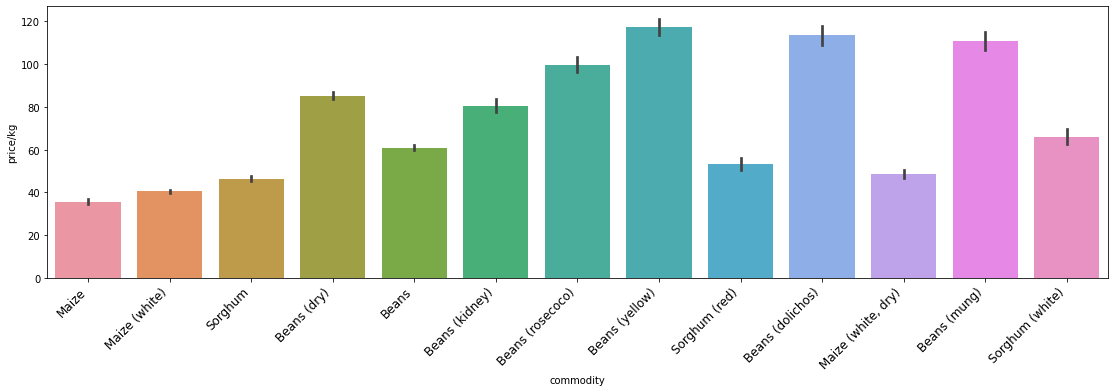

In [48]:
plt.figure(figsize=(19,5))
sns.barplot(x='commodity', y='price/kg', data =food_df)

#  resizing the x axix 
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.show()

Beans fetches the highest price. Yellow bean being the highest. Maize has the lowest price. White soghum is of higher value than maize.

In [49]:
import folium
from folium.plugins import MarkerCluster

# Filter the data for relevant columns
map_data = food_df[['latitude', 'longitude', 'price/kg', 'county', 'commodity']]

# Create a map centered around the mean of latitude and longitude
center_lat = map_data['latitude'].mean()
center_lon = map_data['longitude'].mean()
map_osm = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(map_osm)

# Add markers for each data point
for _, row in map_data.iterrows():
    popup_text = f"County: {row['county']}<br>Commodity: {row['commodity']}<br>Price/kg: {row['price/kg']} Ksh/kg"
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=popup_text).add_to(marker_cluster)

# Display the map
map_osm


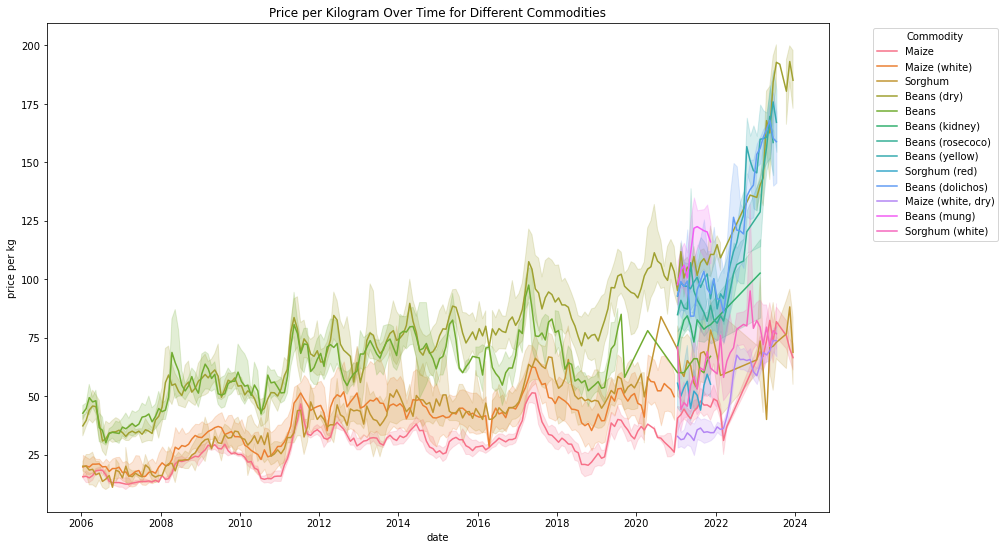

In [50]:
plt.figure(figsize=(14,9))

# sns.set_palette("tab10")

sns.lineplot(x="date", y='price/kg',hue= 'commodity', data =food_df,markers=True)

plt.title("Price per Kilogram Over Time for Different Commodities")
plt.xlabel("date")
plt.ylabel("price per kg")
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show ()

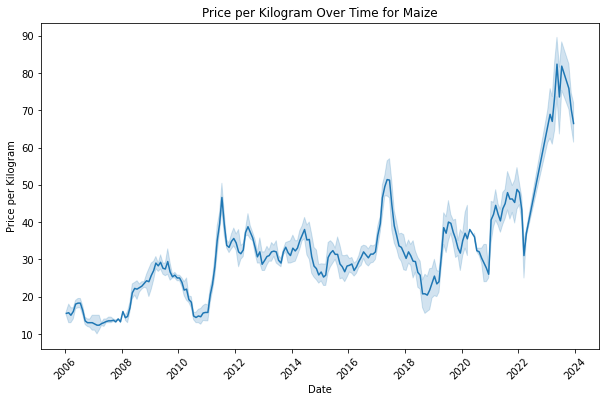

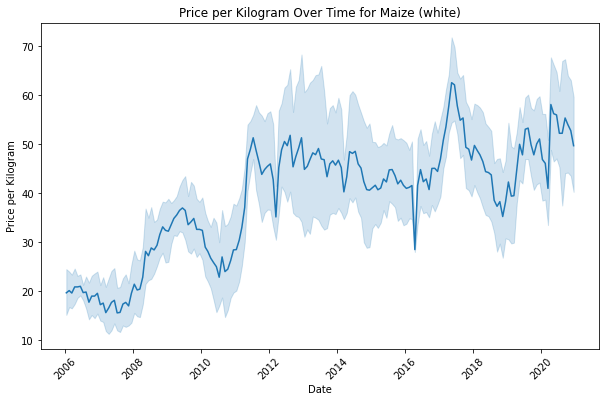

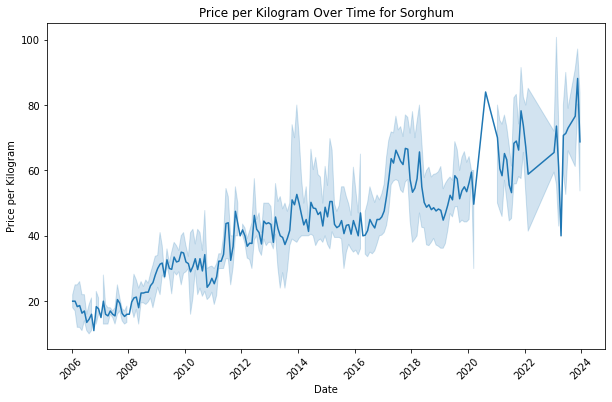

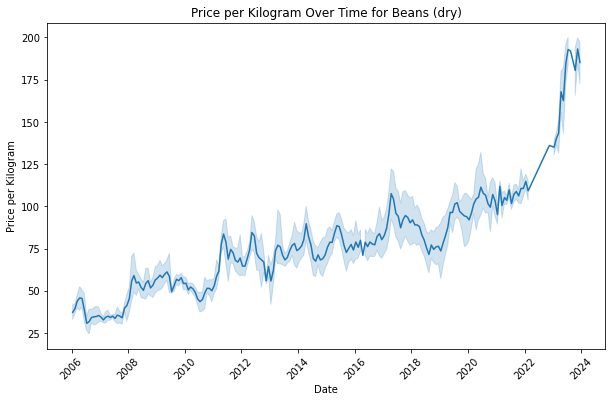

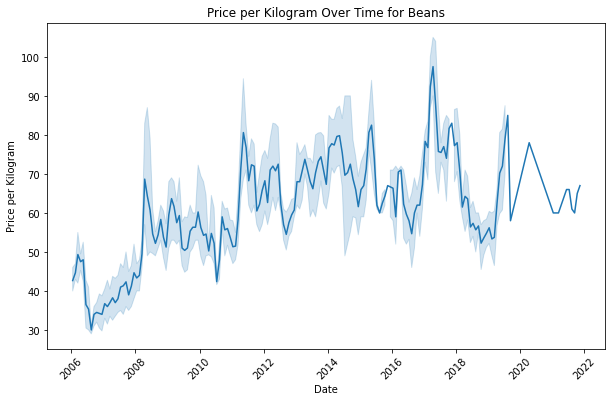

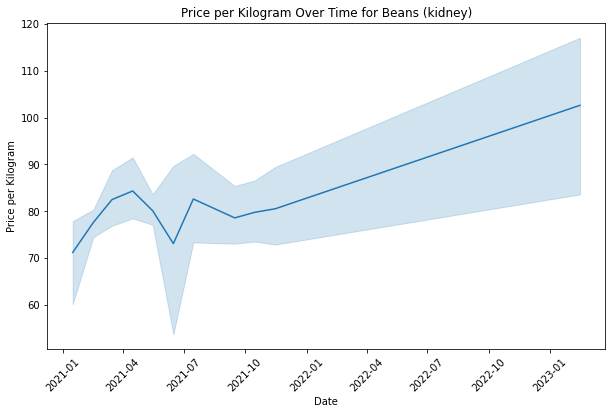

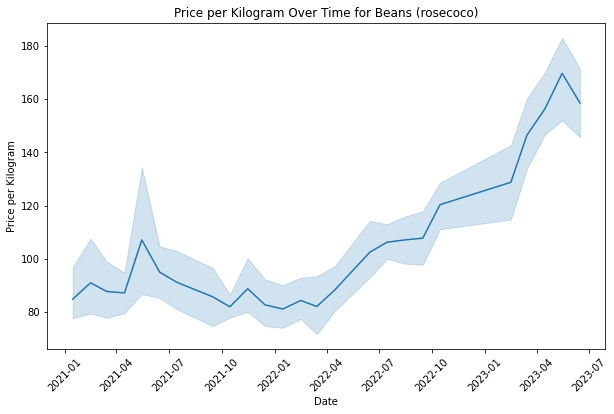

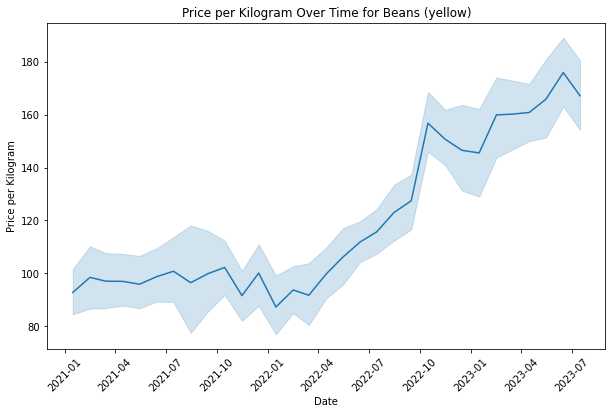

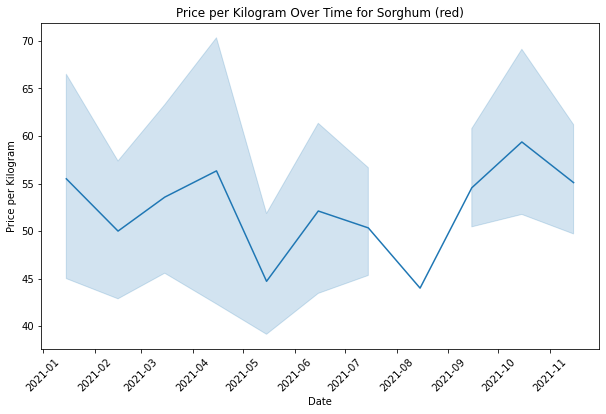

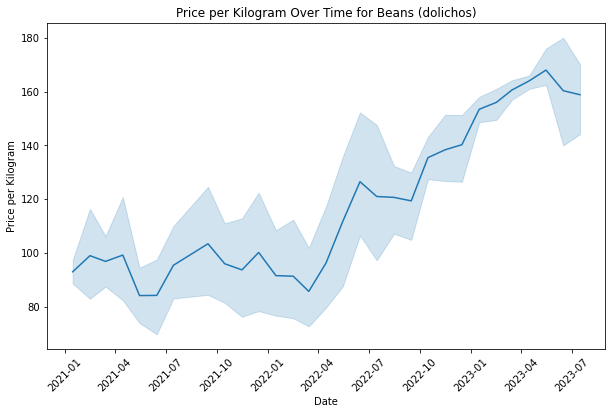

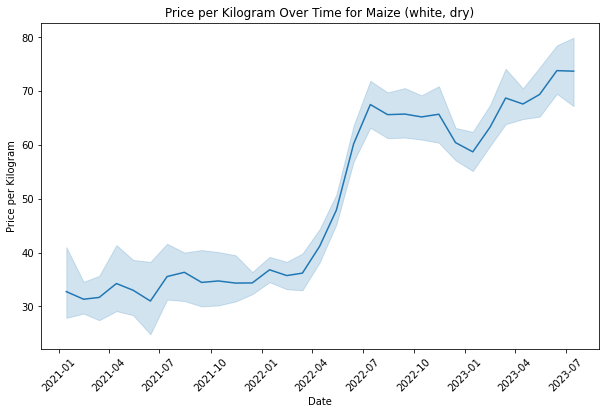

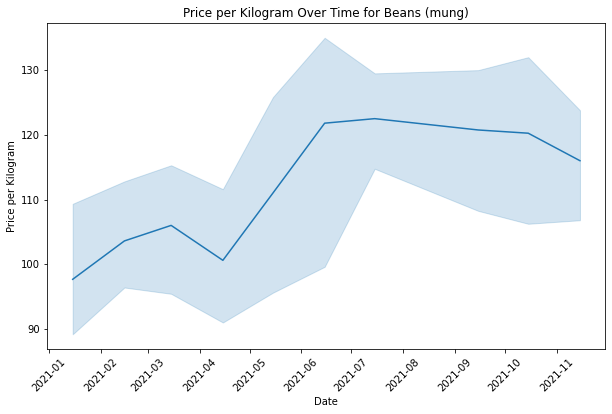

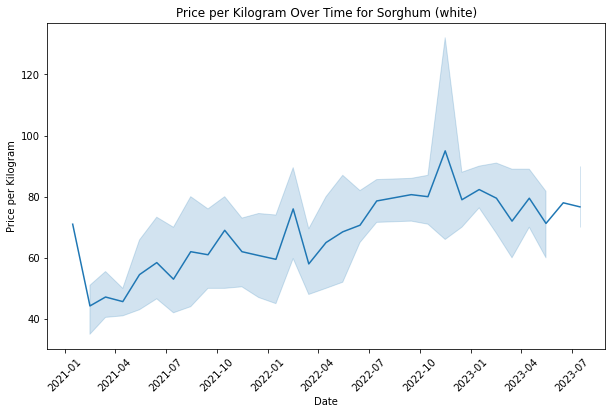

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique commodities
commodities = food_df['commodity'].unique()

# Create a separate plot for each commodity
for commodity in commodities:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='date', y='price/kg', data=food_df[food_df['commodity'] == commodity])
    
    plt.title(f'Price per Kilogram Over Time for {commodity}')
    plt.xlabel('Date')
    plt.ylabel('Price per Kilogram')
    plt.xticks(rotation=45)
    
    plt.show()


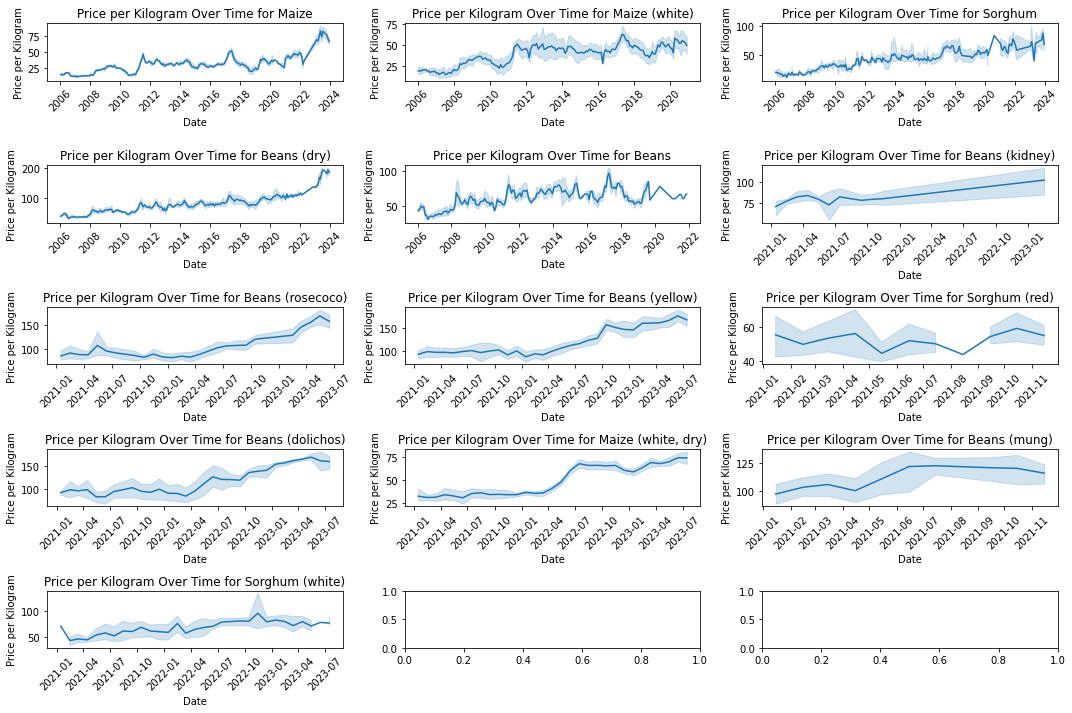

In [52]:
# Get unique commodities
commodities = food_df['commodity'].unique()

# Calculate the number of rows and columns needed
num_plots = len(commodities)
num_rows = (num_plots + 2) // 3  # Round up to the nearest integer
num_cols = min(num_plots, 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

9# Flatten axes if it's not already 2D
if num_plots == 1:
    axes = [axes]

# Iterate through each commodity and create a separate plot
for ax, commodity in zip(axes.flatten(), commodities):
    sns.lineplot(x='date', y='price/kg', data=food_df[food_df['commodity'] == commodity], ax=ax)
    ax.set_title(f'Price per Kilogram Over Time for {commodity}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price per Kilogram')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()


In [53]:
food_df


date       region   county  latitude  longitude      commodity  \
1     2006-01-15        Coast  Mombasa -4.050000  39.666667          Maize   
2     2006-01-15        Coast  Mombasa -4.050000  39.666667  Maize (white)   
3     2006-01-15      Eastern    Kitui -1.366667  38.016667  Maize (white)   
5     2006-01-15      Eastern    Kitui -1.366667  38.016667        Sorghum   
6     2006-01-15      Eastern    Kitui -1.366667  38.016667    Beans (dry)   
...          ...          ...      ...       ...        ...            ...   
14129 2023-12-15  Rift Valley  Turkana  3.768513  34.727999          Maize   
14138 2023-12-15  Rift Valley  Turkana  3.768513  34.727999    Beans (dry)   
14139 2023-12-15  Rift Valley  Turkana  3.760888  34.752832          Maize   
14149 2023-12-15  Rift Valley  Turkana  3.717080  34.850333          Maize   
14158 2023-12-15  Rift Valley  Turkana  3.717080  34.850333    Beans (dry)   

       unit(kg)  priceflag  pricetype  price(ksh)  price(usd)  price/kg  
1           1.0     actual  Wholesale       16.13      0.2235      16.0  
2          90.0     actual  Wholesale     1480.00     20.5041      16.0  
3           1.0     actual     Retail       17.00      0.2355      17.0  
5          90.0     actual  Wholesale     1800.00     24.9374      20.0  
6           1.0     actual     Retail       39.00      0.5403      39.0  
...         ...        ...        ...         ...         ...       ...  
14129       1.0  aggregate     Retail       67.00      0.4359      67.0  
14138       1.0  aggregate     Retail      165.00      1.0735     165.0  
14139       1.0  aggregate     Retail       60.00      0.3904      60.0  
14149       1.0  aggregate     Retail       60.00      0.3904      60.0  
14158       1.0  aggregate     Retail      192.00      1.2492     192.0  

[6803 rows x 12 columns]

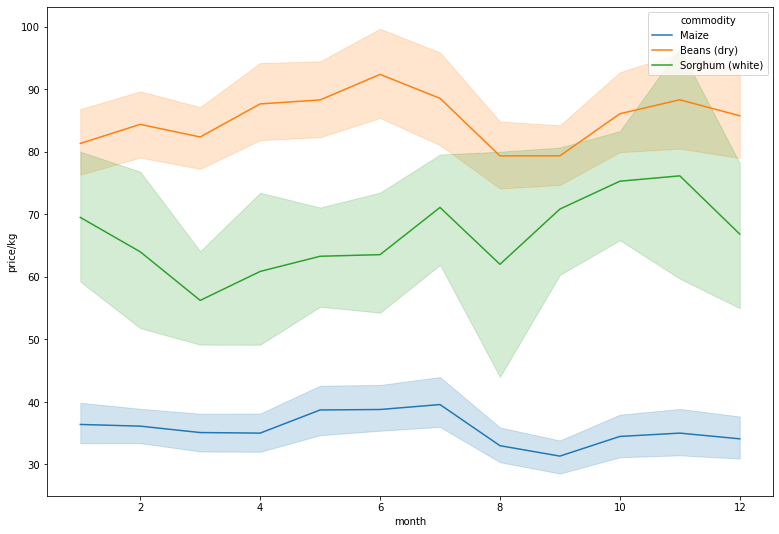

In [54]:
# Plotting montly data for commodities 
# create a column called month
food_df['month']= food_df['date'].dt.month
plt.figure (figsize=(13,9))

# filtering the specific products 
filltered_df=food_df[food_df['commodity'].isin(['Maize', 'Beans (dry)','Sorghum (white)'])]

# ploting
sns.lineplot(x='month', y='price/kg', data=filltered_df, hue='commodity')

plt.show()

In [55]:
food_df

date       region   county  latitude  longitude      commodity  \
1     2006-01-15        Coast  Mombasa -4.050000  39.666667          Maize   
2     2006-01-15        Coast  Mombasa -4.050000  39.666667  Maize (white)   
3     2006-01-15      Eastern    Kitui -1.366667  38.016667  Maize (white)   
5     2006-01-15      Eastern    Kitui -1.366667  38.016667        Sorghum   
6     2006-01-15      Eastern    Kitui -1.366667  38.016667    Beans (dry)   
...          ...          ...      ...       ...        ...            ...   
14129 2023-12-15  Rift Valley  Turkana  3.768513  34.727999          Maize   
14138 2023-12-15  Rift Valley  Turkana  3.768513  34.727999    Beans (dry)   
14139 2023-12-15  Rift Valley  Turkana  3.760888  34.752832          Maize   
14149 2023-12-15  Rift Valley  Turkana  3.717080  34.850333          Maize   
14158 2023-12-15  Rift Valley  Turkana  3.717080  34.850333    Beans (dry)   

       unit(kg)  priceflag  pricetype  price(ksh)  price(usd)  price/kg  month  
1           1.0     actual  Wholesale       16.13      0.2235      16.0      1  
2          90.0     actual  Wholesale     1480.00     20.5041      16.0      1  
3           1.0     actual     Retail       17.00      0.2355      17.0      1  
5          90.0     actual  Wholesale     1800.00     24.9374      20.0      1  
6           1.0     actual     Retail       39.00      0.5403      39.0      1  
...         ...        ...        ...         ...         ...       ...    ...  
14129       1.0  aggregate     Retail       67.00      0.4359      67.0     12  
14138       1.0  aggregate     Retail      165.00      1.0735     165.0     12  
14139       1.0  aggregate     Retail       60.00      0.3904      60.0     12  
14149       1.0  aggregate     Retail       60.00      0.3904      60.0     12  
14158       1.0  aggregate     Retail      192.00      1.2492     192.0     12  

[6803 rows x 13 columns]

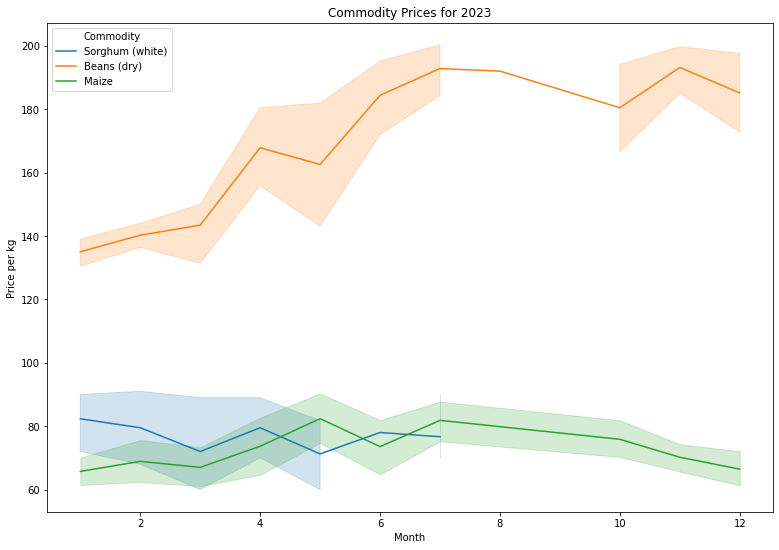

In [56]:
# create a column called 'month' and 'year'
food_df['month'] = food_df['date'].dt.month
food_df['year'] = food_df['date'].dt.year

def plot_commodities_by_year(year, commodities):
    plt.figure(figsize=(13, 9))
    
    # filtering the specific products and year
    filtered_df = food_df[(food_df['commodity'].isin(commodities)) & (food_df['year'] == year)]
    
    # plotting
    sns.lineplot(x='month', y='price/kg', data=filtered_df, hue='commodity')
    plt.title(f'Commodity Prices for {year}')
    plt.xlabel('Month')
    plt.ylabel('Price per kg')
    plt.legend(title='Commodity')
    plt.show()

# Example usage:
year_to_plot = 2023  # Choose the year you want to plot
commodities_to_plot = ['Maize', 'Beans (dry)', 'Sorghum (white)']  # Choose commodities to plot
plot_commodities_by_year(year_to_plot, commodities_to_plot)


In [57]:
def plot_commodities_by_year(year, commodities):
    plt.figure(figsize=(13, 9))
    
    # filtering the specific products and year
    filtered_df = food_df[(food_df['commodity'].isin(commodities)) & (food_df['year'] == year)]
    
    # plotting
    sns.lineplot(x='month', y='price/kg', data=filtered_df, hue='commodity')
    plt.title(f'Commodity Prices for {year}')
    plt.xlabel('Month')
    plt.ylabel('Price per kg')
    plt.legend(title='Commodity')
    plt.show()

# Define a function to update the plot when the button is clicked
def update_plot(b):
    year = year_select.value
    plot_commodities_by_year(year, commodities_to_plot)

# Define commodities to plot
commodities_to_plot = ['Maize', 'Beans (dry)', 'Sorghum (white)']

# Create a dropdown widget for selecting the year
year_select = widgets.IntSlider(value=2023, min=food_df['year'].min(), max=food_df['year'].max(), step=1, description='Year:')

# Create a button widget
plot_button = widgets.Button(description='Plot')

# Assign the update_plot function to be called when the button is clicked
plot_button.on_click(update_plot)

# Display the widgets
display(year_select)
display(plot_button)

# Plot initial data
plot_commodities_by_year(year_select.value, commodities_to_plot)


NameError: name 'widgets' is not defined